In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
import seaborn as sns

In [2]:
df1 = pd.read_csv("dataset/03_Delivery.csv", encoding="cp949")

## 주중/주말: 
> - `df1["주중/주말"] = df1["주문요일"].replace({'Thursday': '주중', 'Saturday': '주말', 'Sunday': '주말', 'Monday': '주중', 'Tuesday': '주중', 'Wednesday': '주중', 'Friday': '주중'})`
> - df1["주중/주말"].unique()에서 요일 값을 긁어 오면 편하다


pivot_table
- aggfunc="sum"
> - (판매)수량 비교
> - (매출액)상품구매금액의 총합 비교
- sum은 일주일 중 주중이 5일, 주말이 2일이라는 점에 의한 차이일 수 있다. 따라서 건당 mean을 살펴보자
- aggfunc="mean"
> - (주문당) 상품구매금액의 평균 : 비슷하다.


barplot
- 매출액 비교
> `sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator="sum", errorbar=None)` 
- 주문경로별 매출액 비교
> - `sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator="sum", errorbar=None, hue="주문경로")` 
> - 주중/주말에 따라서 주문경로에 차이가 있다. 주말에는 모바일웹 매출액이 가장 높다.

## 배송기간

- 배송시작일
- 배송종료일

In [3]:
df1.head(3)

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230


In [4]:
df1["주문일(dt)"] = pd.to_datetime(df1["주문일"], format="%Y%m%d")
df1["주문요일"] = df1["주문일(dt)"].dt.day_name()
df1["주중/주말"] = df1["주문요일"].replace({'Thursday': '주중', 'Saturday': '주말', 'Sunday': '주말', 'Monday': '주중', 'Tuesday': '주중', 'Wednesday': '주중',
       'Friday': '주중'})

In [5]:
df1["주중/주말"].value_counts()

주중    42406
주말     4343
Name: 주중/주말, dtype: int64

In [6]:
# 판매수량: 주중 > 주말
df1.pivot_table(index="주중/주말", values="수량", aggfunc="sum")

,수량
주중/주말,
주말,5149
주중,49878


In [7]:
# 매출액: 주중 > 주말
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="sum")

,상품구매금액
주중/주말,
주말,306863800
주중,2936027585


sum은 일주일 중 주중이 5일, 주말이 2일이라는 점에 의한 차이일 수 있다.
> 따라서 건당 mean을 살펴보자

## 1

In [8]:
# 주문당 상품구매금액 평균: 비슷하다.
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="mean")

,상품구매금액
주중/주말,
주말,70657.103385
주중,69236.136042


## 2

<Axes: xlabel='주중/주말', ylabel='상품구매금액'>

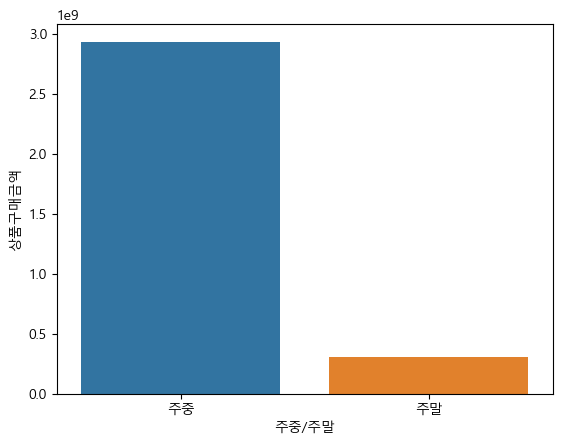

In [9]:
# 매출액 비교
sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator="sum", errorbar=None)

## 3
주문경로별 매출액 비교:
> 주중/주말에 따라서 주문경로에 차이가 있다. 주말에는 모바일웹 매출액이 가장 높다.

<Axes: xlabel='주중/주말', ylabel='상품구매금액'>

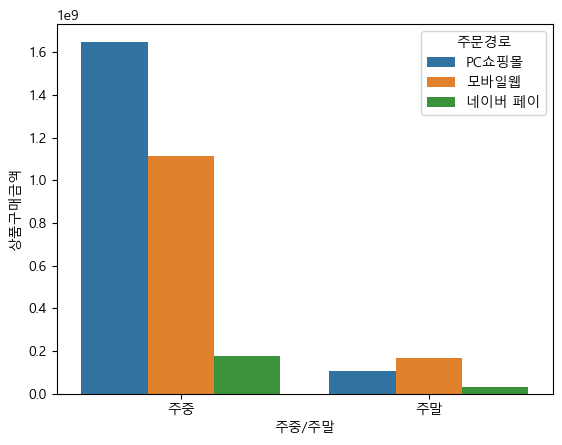

In [10]:
sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator="sum", errorbar=None, hue="주문경로")

# 시작일/종료일 배송기간 분석

## 4

- pd.Series.apply(func)
> - ser의 value가 func1에 하나씩 들어간다. 따라서 ser의 dtype이 중요.
- pd.Timedelta
> **timedelta**: 격차, 양을 나타내는 타입, 데이터 간의 간격을 구하는 타입, 시간 간의 차이를 계산 



### 배송기간(timedelta) col 만들기
col 만들기: apply(적절한 함수 만들기) -> to_datetime
- 배송시작일(dt) 
> - 오전 8:56 format 이다. 따라서 pd.to_datetime 사용 못한다. 
> - 그래서 pd.Series.apply(func) 사용한다.
- 배송완료일(dt) 
- 배송기간(td)
> - 배송기간이 4days 보다 오래 걸린 데이터 filtering
> 2622개가 있다.
- string "4 days"는 pd.Timedelta(days=4)로 pandas에 의해 자동변환 된다.
배송기간 > 7일인 데이터 filtering


In [27]:
# 오전 8:56 format 이다.
# pd.to_datetime 사용 못한다.
df1["배송시작일"]

0         2019-01-07 오전 8:56
1         2019-01-03 오전 9:30
2         2019-01-03 오전 9:30
3         2019-01-03 오전 9:30
4         2019-01-07 오전 8:56
                ...         
46744     2017-12-29 오후 4:32
46745     2018-01-03 오전 9:45
46746     2018-01-02 오후 7:06
46747     2018-01-03 오후 2:00
46748    2018-01-03 오후 12:43
Name: 배송시작일, Length: 46749, dtype: object

In [12]:
# identity function
def func1(row):
    return row

In [13]:
# ser의 value가 func1에 하나씩 들어간다.
df1["배송시작일"].apply(func1)

0         2019-01-07 오전 8:56
1         2019-01-03 오전 9:30
2         2019-01-03 오전 9:30
3         2019-01-03 오전 9:30
4         2019-01-07 오전 8:56
                ...         
46744     2017-12-29 오후 4:32
46745     2018-01-03 오전 9:45
46746     2018-01-02 오후 7:06
46747     2018-01-03 오후 2:00
46748    2018-01-03 오후 12:43
Name: 배송시작일, Length: 46749, dtype: object

In [14]:
# 공백을 기준으로 나눠보기
def func2(row):
    return row.split(' ')

In [15]:
df1["배송시작일"].apply(func2)

0         [2019-01-07, 오전, 8:56]
1         [2019-01-03, 오전, 9:30]
2         [2019-01-03, 오전, 9:30]
3         [2019-01-03, 오전, 9:30]
4         [2019-01-07, 오전, 8:56]
                  ...           
46744     [2017-12-29, 오후, 4:32]
46745     [2018-01-03, 오전, 9:45]
46746     [2018-01-02, 오후, 7:06]
46747     [2018-01-03, 오후, 2:00]
46748    [2018-01-03, 오후, 12:43]
Name: 배송시작일, Length: 46749, dtype: object

In [16]:
# 공백 기준으로 나누고 날짜만 뽑기
def func3(row):
    return row.split(' ')[0]

In [17]:
df1["배송시작일"].apply(func3)

0        2019-01-07
1        2019-01-03
2        2019-01-03
3        2019-01-03
4        2019-01-07
            ...    
46744    2017-12-29
46745    2018-01-03
46746    2018-01-02
46747    2018-01-03
46748    2018-01-03
Name: 배송시작일, Length: 46749, dtype: object

In [18]:
# to_datetime에 넣기
df1["배송시작일(dt)"] = pd.to_datetime(df1["배송시작일"].apply(func3))

In [19]:
df1.head()

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(dt),주문요일,주중/주말,배송시작일(dt)
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2018-12-27,Thursday,주중,2019-01-07
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2018-12-29,Saturday,주말,2019-01-03
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2018-12-30,Sunday,주말,2019-01-03
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2018-12-31,Monday,주중,2019-01-03
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2018-12-31,Monday,주중,2019-01-07


In [20]:
df1["배송완료일(dt)"] = pd.to_datetime(df1["배송완료일"].apply(func3))

## 5
- 배송기간(timedelta) col 만들기
> dt 타입이라 연산 & 요약 통계량 확인 가능
- **timedelta**: 격차, 양을 나타내는 타입, 데이터 간의 간격을 구하는 타입, 
> 시간 간의 차이를 계산

In [21]:
df1["배송기간"] = df1["배송완료일(dt)"] - df1["배송시작일(dt)"]

In [22]:
df1["배송기간"]

0       4 days
1       4 days
2       4 days
3       4 days
4       4 days
         ...  
46744   4 days
46745   4 days
46746   9 days
46747   3 days
46748   4 days
Name: 배송기간, Length: 46749, dtype: timedelta64[ns]

In [23]:
df1["배송기간"].describe()

count                        46749
mean     4 days 04:38:57.008278251
std      1 days 04:56:12.144368428
min                0 days 00:00:00
25%                4 days 00:00:00
50%                4 days 00:00:00
75%                4 days 00:00:00
max               47 days 00:00:00
Name: 배송기간, dtype: object

## 6
배송기간이 4days 보다 오래 걸린 데이터 filtering
> 2622개가 있다.
- string "4 days"는 pd.Timedelta(days=4)로 pandas에 의해 자동변환 된다.

In [24]:
cond1 = (df1["배송기간"] > pd.Timedelta(days=4))
df1.loc[cond1]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(dt),주문요일,주중/주말,배송시작일(dt),배송완료일(dt),배송기간
41,카드,D-20190101-0000055-01,2019-01-03 오전 9:32,2019-01-09 오후 3:47,42350,1283.0,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-09,6 days
47,적립금,D-20190101-0000106-01,2019-01-03 오전 9:30,2019-01-13 오전 7:19,68970,38.0,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-13,10 days
68,카드,D-20190102-0000013-01,2019-01-03 오전 9:30,2019-01-08 오전 9:21,78870,603.0,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-08,5 days
102,카드,D-20190102-0000224-01,2019-01-03 오전 9:30,2019-01-08 오후 2:01,134640,1282.0,2,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-08,5 days
106,무통장입금,D-20190102-0000242-01,2019-01-03 오전 9:30,2019-01-09 오후 1:01,123420,70.0,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-09,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46738,카드,D-20171228-0000132-02,2017-12-29 오후 4:34,2018-01-03 오전 10:38,76600,107.0,10,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-03,5 days
46739,카드,D-20171228-0000132-03,2017-12-29 오후 4:34,2018-01-03 오전 9:20,47300,248.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-03,5 days
46740,카드,D-20171228-0000132-04,2017-12-29 오후 4:34,2018-01-07 오전 4:55,69960,293.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days
46741,카드,D-20171228-0000132-05,2017-12-29 오후 4:34,2018-01-07 오전 4:55,63140,305.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days


## 7

배송기간 > 7일인 데이터 filtering
- 파일로 저장해서 갖고 있으면, 나중에 처리 작업을 반복하지 않아도 된다.
- 매번 처리 작업을 반복하지 않아도 된다.

In [25]:
def func4(row):
    return str(row).split(' ')[0]
df1["배송기간(int)"] = df1["배송기간"].apply(func4).astype(int)

In [26]:
cond1 = (df1["배송기간(int)"] >= 7)
df1.loc[cond1]#.to_excel("delay_delivery.xlsx")

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일(dt),주문요일,주중/주말,배송시작일(dt),배송완료일(dt),배송기간,배송기간(int)
47,적립금,D-20190101-0000106-01,2019-01-03 오전 9:30,2019-01-13 오전 7:19,68970,38.0,1,네이버 페이,20190101,2019-01-01,Tuesday,주중,2019-01-03,2019-01-13,10 days,10
132,카드,D-20190102-0000463-01,2019-01-03 오후 6:20,2019-01-28 오후 4:33,388080,1217.0,3,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-28,25 days,25
134,카드,D-20190102-0000498-01,2019-01-03 오후 6:20,2019-01-28 오후 4:15,129360,1217.0,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-28,25 days,25
193,카드,D-20190102-0000938-01,2019-01-03 오후 6:20,2019-01-13 오전 4:38,82170,380.0,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-13,10 days,10
194,카드,D-20190102-0000938-02,2019-01-03 오후 6:20,2019-01-13 오전 4:38,77220,379.0,1,네이버 페이,20190102,2019-01-02,Wednesday,주중,2019-01-03,2019-01-13,10 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46719,무통장입금,D-20171227-0000106-01,2017-12-28 오후 5:54,2018-01-06 오전 1:18,104000,68.0,1,네이버 페이,20171227,2017-12-27,Wednesday,주중,2017-12-28,2018-01-06,9 days,9
46737,카드,D-20171228-0000132-01,2017-12-29 오후 4:34,2018-01-07 오전 4:55,74000,483.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days,9
46740,카드,D-20171228-0000132-04,2017-12-29 오후 4:34,2018-01-07 오전 4:55,69960,293.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days,9
46741,카드,D-20171228-0000132-05,2017-12-29 오후 4:34,2018-01-07 오전 4:55,63140,305.0,1,네이버 페이,20171228,2017-12-28,Thursday,주중,2017-12-29,2018-01-07,9 days,9
